In [1]:
#Importing the necessary modules
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
import matplotlib.pyplot as plt 
import seaborn as sns
from math import sqrt

In [2]:
#Reading the csv file and storing it in dataframe
df = pd.read_csv('winequality-red.csv')

In [3]:
#Checking the first 5 rows in the dataframe
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
#Checking the shape of the dataframe
print('There are ',df.shape[0],' rows and ',df.shape[1],' columns in the dataframe.')

There are  1599  rows and  12  columns in the dataframe.


In [5]:
#To check the statistical information of the dataframe
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#To check if there any missing values in the dataframe
print (df.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
#To check the correlation of the independent variables with respect to target variable - quality
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


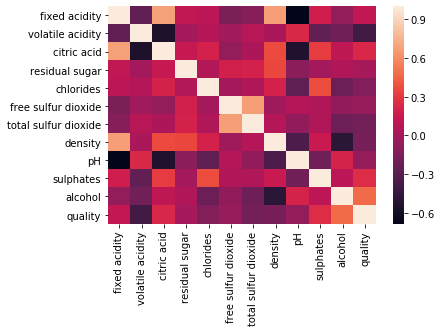

In [8]:
#Plotting the correlation graph
sns.heatmap(df.corr())
plt.show()

In [9]:
features = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
            'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

In [10]:
X = df.drop('quality',axis=1)

In [11]:
y = df['quality']

In [12]:
#Performing train test split with 75% data with train and 25% with test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 42)

In [13]:
#Fitting linear regression algorithm on training data
linreg = LinearRegression()
linreg.fit(X_train,y_train)

LinearRegression()

In [14]:
#Printing the coefficients of the features
print(linreg.coef_)

[ 2.18600313e-02 -1.00869523e+00 -1.33904164e-01  8.85944150e-03
 -1.75557840e+00  5.00853894e-03 -3.65426072e-03 -1.62236478e+01
 -3.43939544e-01  8.19819425e-01  2.86228187e-01]


In [15]:
#Predicting quality of wine on train and test dataset
train_pred = linreg.predict(X_train)
test_pred = linreg.predict(X_test)

In [16]:
print(train_pred)
print('\n')
print(test_pred)

[5.23381934 5.04148093 5.8674267  ... 4.97834394 6.63788787 6.76273841]


[5.34360227 5.06294956 5.63333204 5.45176186 5.74570371 5.27637941
 5.03060591 5.14548634 5.74793413 5.71379639 6.14292388 5.25602325
 5.55746352 5.25516748 5.44918167 6.50428691 5.16155023 5.58177831
 6.56354719 5.31109369 5.42314936 5.19226562 5.99245498 6.40578182
 5.36515018 5.42441564 6.35376721 5.37618609 5.16180078 6.16014475
 5.25888679 5.538378   5.7525049  5.3863994  5.45667328 5.02911082
 6.1905284  5.71266674 5.63463533 6.20179362 5.50279355 5.24191583
 6.16908347 5.15779342 5.85212953 5.8169982  6.415135   5.57902528
 5.16752006 5.57681837 5.12302477 5.08832659 5.6067245  6.37829292
 4.96528844 4.97488594 6.03283966 5.4259819  5.86156997 5.26390122
 5.60706205 5.97031204 5.28379018 5.32034058 6.50607979 5.41422594
 6.36327206 5.25281218 6.43657812 5.30042793 6.45787251 4.75051838
 5.7864449  5.85992669 6.20765657 5.28686299 6.81315764 5.89419286
 6.11784951 6.46159339 5.31818885 6.4649474  5.44746923

In [17]:
#Calculating RMSE for both train and test dataset
train_rmse = sqrt(mean_squared_error(train_pred, y_train))
print(train_rmse)
test_rmse = sqrt(mean_squared_error(test_pred, y_test))
print(test_rmse)

0.653772627640322
0.6231386191586039


In [18]:
#Displaying coefficients of each feature
coeffecients = pd.DataFrame(linreg.coef_,features)
coeffecients.columns = ['Coeffecient'] 
print(coeffecients)

                      Coeffecient
fixed acidity            0.021860
volatile acidity        -1.008695
citric acid             -0.133904
residual sugar           0.008859
chlorides               -1.755578
free sulfur dioxide      0.005009
total sulfur dioxide    -0.003654
density                -16.223648
pH                      -0.343940
sulphates                0.819819
alcohol                  0.286228
